In [106]:
import pandas as pd
import calplot
import folium
from folium.plugins import HeatMap
from bokeh.palettes import brewer
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file

In [73]:
data = pd.read_csv('crime.csv')

In [74]:
data.columns
data.Date = pd.to_datetime(data.Date)
data.Time = pd.to_datetime(data.Time)
data = data[data.Date.dt.year < 2018]
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
focusData = data[data.Category.isin(focuscrimes)]

In [75]:
data


PdId  IncidntNum  Incident Code        Category  \
0         4133422003074    41334220           3074         ROBBERY   
1         5118535807021    51185358           7021   VEHICLE THEFT   
2         4018830907021    40188309           7021   VEHICLE THEFT   
3        11014543126030   110145431          26030           ARSON   
4        10108108004134   101081080           4134         ASSAULT   
...                 ...         ...            ...             ...   
2129520  17050730416710   170507304          16710   DRUG/NARCOTIC   
2129521  17071435504014   170714355           4014         ASSAULT   
2129522  17053348465010   170533484          65010  OTHER OFFENSES   
2129523  17102776330130   171027763          30130  OTHER OFFENSES   
2129524  17088142128160   170881421          28160       VANDALISM   

                                          Descript  DayOfWeek       Date  \
0                            ROBBERY, BODILY FORCE     Monday 2004-11-22   
1                                STOLEN AUTOMOBILE    Tuesday 2005-10-18   
2                                STOLEN AUTOMOBILE     Sunday 2004-02-15   
3                                            ARSON     Friday 2011-02-18   
4                                          BATTERY     Sunday 2010-11-21   
...                                            ...        ...        ...   
2129520      POSSESSION OF NARCOTICS PARAPHERNALIA   Thursday 2017-06-22   
2129521       AGGRAVATED ASSAULT WITH BODILY FORCE     Friday 2017-09-01   
2129522                   TRAFFIC VIOLATION ARREST     Friday 2017-06-30   
2129523                 PEDDLING WITHOUT A LICENSE  Wednesday 2017-12-20   
2129524  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Friday 2017-10-27   

                       Time PdDistrict      Resolution  ...  \
0       2023-03-21 17:50:00  INGLESIDE            NONE  ...   
1       2023-03-21 20:00:00       PARK            NONE  ...   
2       2023-03-21 02:00:00   SOUTHERN            NONE  ...   
3       2023-03-21 05:27:00  INGLESIDE            NONE  ...   
4       2023-03-21 17:00:00   SOUTHERN            NONE  ...   
...                     ...        ...             ...  ...   
2129520 2023-03-21 01:42:00    CENTRAL   ARREST, CITED  ...   
2129521 2023-03-21 17:00:00       PARK            NONE  ...   
2129522 2023-03-21 17:50:00    BAYVIEW  ARREST, BOOKED  ...   
2129523 2023-03-21 15:41:00   SOUTHERN  ARREST, BOOKED  ...   
2129524 2023-03-21 21:30:00  INGLESIDE            NONE  ...   

        Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0                                      NaN                      NaN   
1                                      NaN                      NaN   
2                                      NaN                      NaN   
3                                      NaN                      NaN   
4                                      NaN                      NaN   
...                                    ...                      ...   
2129520                                NaN                      NaN   
2129521                                NaN                      NaN   
2129522                                NaN                      NaN   
2129523                                3.0                      1.0   
2129524                                NaN                      NaN   

         Fix It Zones as of 2018-02-07 2 2  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
2129520                                NaN   
2129521                                NaN   
2129522                               22.0   
2129523                                3.0   
2129524                                NaN   

        CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                              N

In [76]:
focusData = focusData[['PdDistrict', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'X', 'Y']]
focusData.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)
focusData['latitude'] = focusData['latitude'].astype(float)
focusData['longitude'] = focusData['longitude'].astype(float)
focusData.head()

PdDistrict       Category               Descript DayOfWeek       Date  \
0  INGLESIDE        ROBBERY  ROBBERY, BODILY FORCE    Monday 2004-11-22   
1       PARK  VEHICLE THEFT      STOLEN AUTOMOBILE   Tuesday 2005-10-18   
2   SOUTHERN  VEHICLE THEFT      STOLEN AUTOMOBILE    Sunday 2004-02-15   
4   SOUTHERN        ASSAULT                BATTERY    Sunday 2010-11-21   
5    TARAVAL        ASSAULT                BATTERY   Tuesday 2013-04-02   

                 Time   longitude   latitude  
0 2023-03-21 17:50:00 -122.420084  37.708311  
1 2023-03-21 20:00:00 -120.500000  90.000000  
2 2023-03-21 02:00:00 -120.500000  90.000000  
4 2023-03-21 17:00:00 -122.410541  37.770913  
5 2023-03-21 15:50:00 -122.470366  37.745158

### What the hell happened to drugs

It can be interesting to research why trespassing rises and peaks in 2016

(<Figure size 1250x2550 with 16 Axes>,
 array([<Axes: ylabel='2003'>, <Axes: ylabel='2004'>,
        <Axes: ylabel='2005'>, <Axes: ylabel='2006'>,
        <Axes: ylabel='2007'>, <Axes: ylabel='2008'>,
        <Axes: ylabel='2009'>, <Axes: ylabel='2010'>,
        <Axes: ylabel='2011'>, <Axes: ylabel='2012'>,
        <Axes: ylabel='2013'>, <Axes: ylabel='2014'>,
        <Axes: ylabel='2015'>, <Axes: ylabel='2016'>,
        <Axes: ylabel='2017'>], dtype=object))

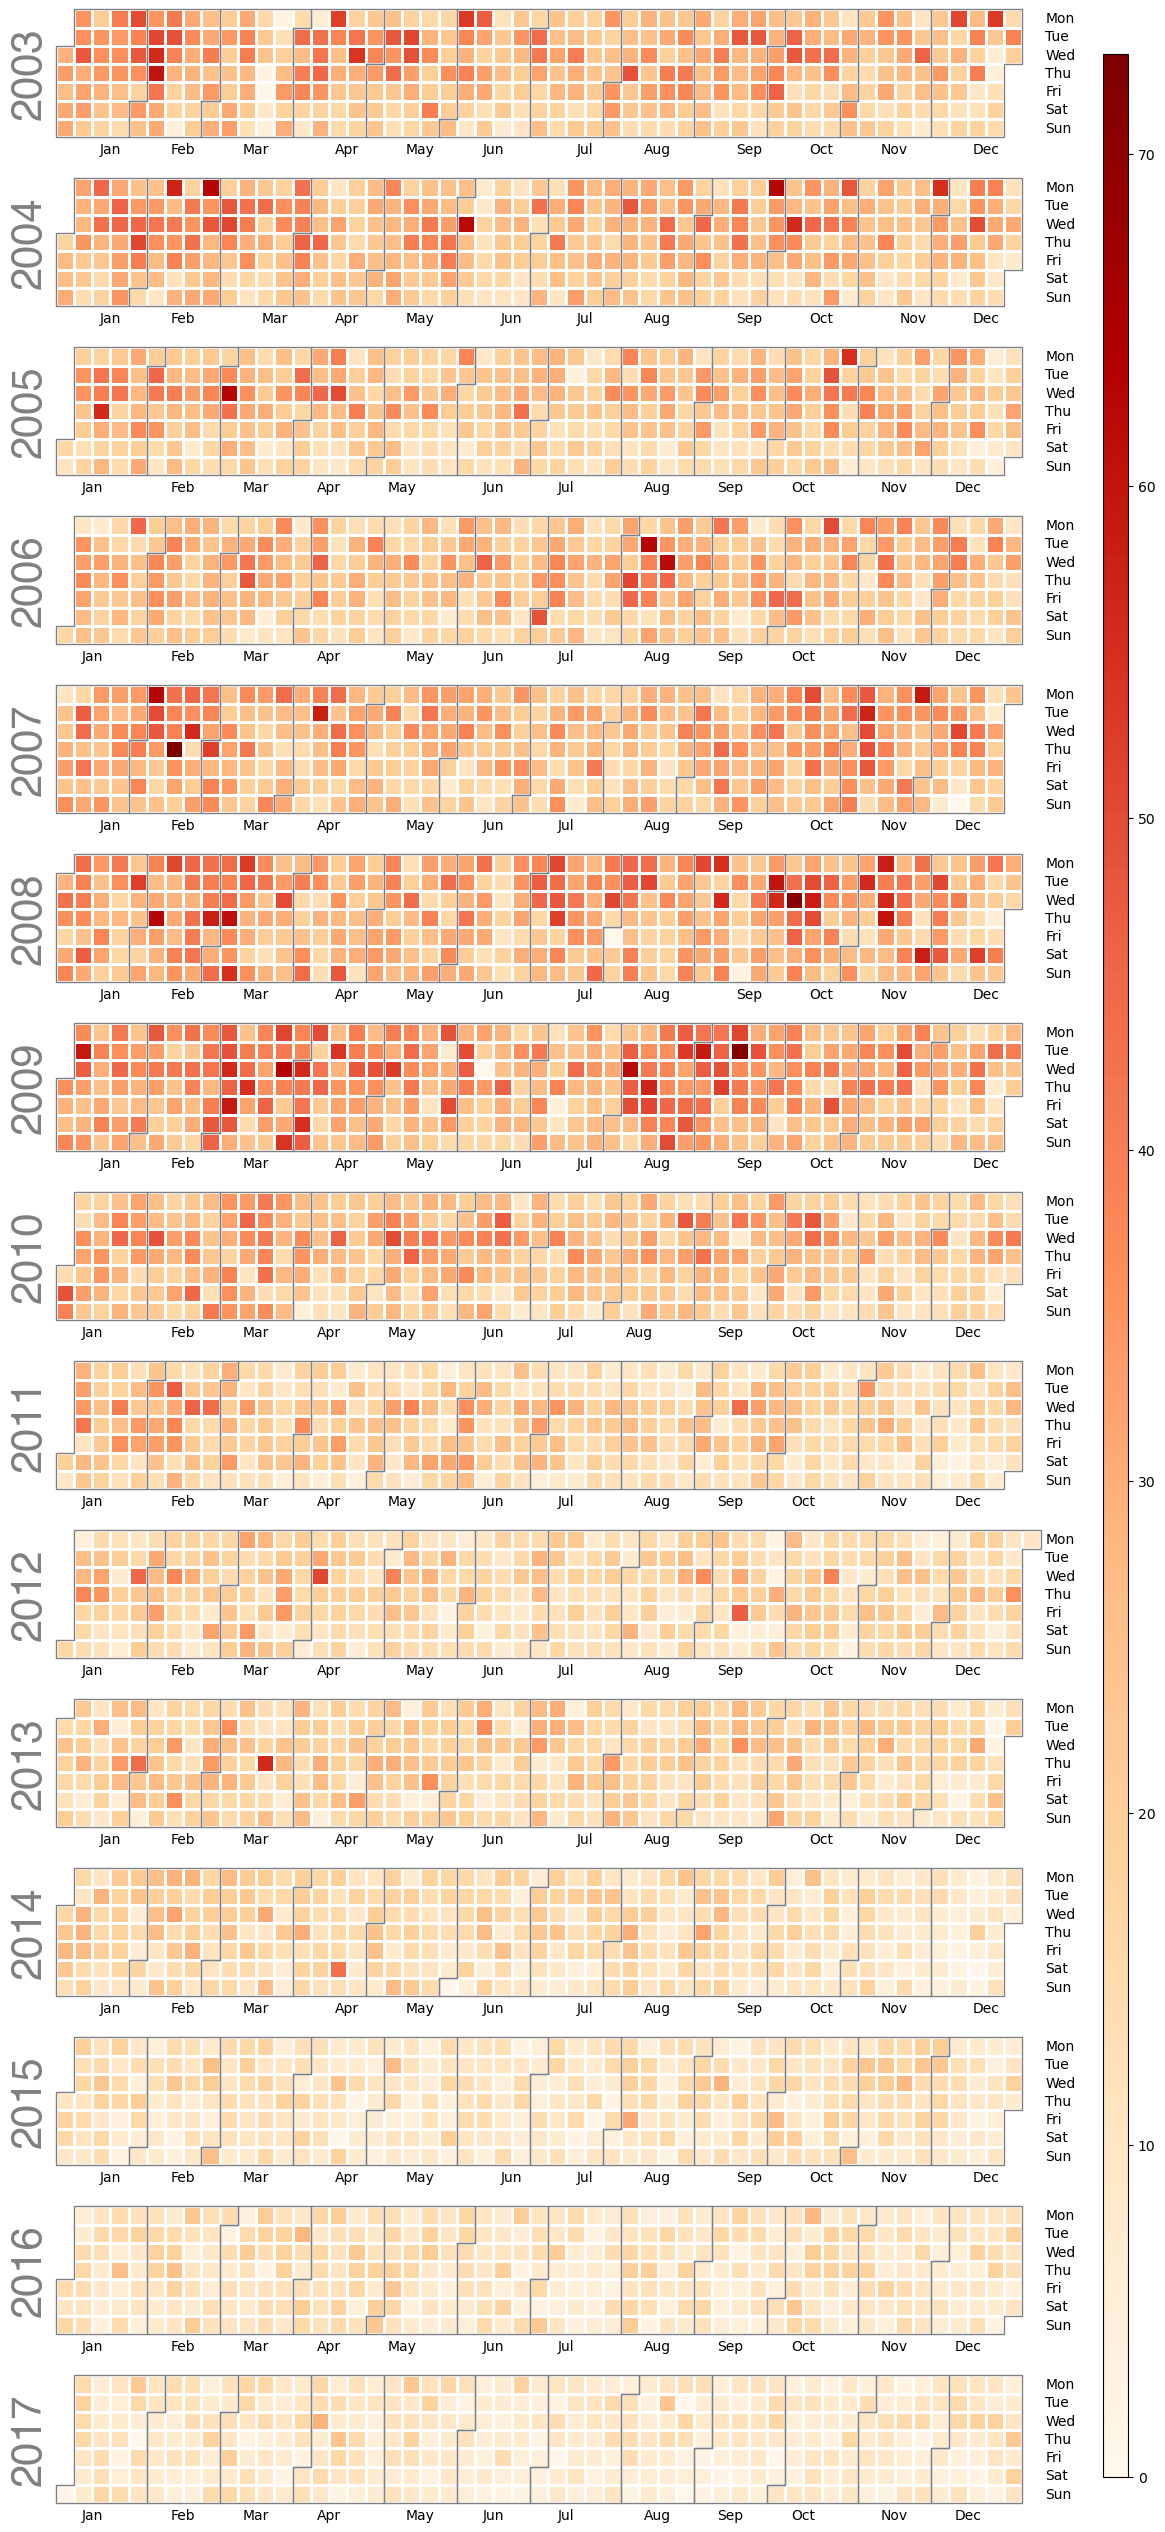

In [77]:
drugCalData = focusData[focusData['Category'] == 'DRUG/NARCOTIC']
drugCalData.set_index('Date', inplace=True)
calplot.calplot(drugCalData.Category, how='count', cmap='OrRd', colorbar=True)

In [78]:
drugData = focusData[focusData['Category'] == 'DRUG/NARCOTIC']
drugData['Year'] = drugData['Date'].dt.year

/var/folders/2f/78qzpl6n3x346dxl7yjbx3mr0000gn/T/ipykernel_1464/1209945053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugData['Year'] = drugData['Date'].dt.year


In [79]:
heat_data = [[[row['latitude'],row['longitude']] for index, row in drugData[drugData['Date'].dt.year == i].iterrows()] for i in range(2003,2018)]
drugMap = folium.Map([37.7568, -122.4342], tiles = "Stamen Toner", zoom_start=13)
hm = folium.plugins.HeatMapWithTime(heat_data,auto_play=False, max_opacity=0.8, radius=16)
hm.add_to(drugMap)
drugMap

In [80]:
districtData = drugData.groupby(['Year', 'PdDistrict']).size().unstack()
districtData

PdDistrict  BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
Year                                                                         
2003            866      319        349     2071       763   381       138   
2004           1105      319        356     1906       862   329       153   
2005            774      172        309     1563       739   350        90   
2006            808      227        357     1902       897   401       165   
2007            779      299        451     1518       911   565       180   
2008            583      392        403     1653       701   474       137   
2009            700      383        392     1484       794   601       185   
2010            646      260        552     1360       741   448       209   
2011            645      181        323      965       572   353       127   
2012            683      224        290      824       549   407       176   
2013            596      237        327     1022       714   367       169   
2014            437      349        288      806       607   357       166   
2015            432      208        212      643       505   248        61   
2016            322      207        190      633       524   273        76   
2017            193      147        164      437       511   131        92   

PdDistrict  SOUTHERN  TARAVAL  TENDERLOIN  
Year                                       
2003            2039      231        2627  
2004            1652      227        2883  
2005            1199      224        3024  
2006            1289      193        2704  
2007            1717      206        3734  
2008            1956      335        4822  
2009            2022      415        4795  
2010            1729      231        2860  
2011            1223      242        2171  
2012             931      224        1999  
2013            1284      196        1760  
2014             951      142        1221  
2015             696      112        1077  
2016             913      107         957  
2017             755      104         731

In [107]:
names = drugData['PdDistrict'].sort_values(ascending=False).unique()
names = names.tolist()
output_file('bokeh_assignment2.html')
names

['TENDERLOIN',
 'TARAVAL',
 'SOUTHERN',
 'RICHMOND',
 'PARK',
 'NORTHERN',
 'MISSION',
 'INGLESIDE',
 'CENTRAL',
 'BAYVIEW']

In [102]:
sortednames = ['TENDERLOIN',
 'SOUTHERN',
 'MISSION',
 'NORTHERN',
 'PARK',
 'BAYVIEW',
 'RICHMOND',
 'INGLESIDE',
 'CENTRAL',
 'TARAVAL']

In [108]:
title = 'Development of drug-related crimes over the years in San Francisco'
N = len(names)
p = figure(x_range=(2003, 2017), x_axis_label='Year', y_axis_label='Drug/narcotic crimes per district', title=title, plot_width=800, plot_height=400)
p.varea_stack(stackers=sortednames, x='Year', color=brewer['Spectral'][N], legend_label=sortednames, source=districtData, muted_alpha=0.5, muted=True)
p.legend.click_policy='mute'
p.legend.orientation = 'vertical'
p.add_layout(p.legend[0], 'left')
show(p)